# Forecasting Sticker Sales

## 1. Datasets and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

df = pd.read_csv(utils.TRAIN_PATH)
df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


My first thought is that this might be a time-series problem. The evidence is that we have the `date` column spanned from 2010 - 2016. Let see how many distinct dates are there in the datasets.

In [31]:
df["date"].describe()

count         230130
unique          2557
top       2016-12-31
freq              90
Name: date, dtype: object

In [32]:
print(df["date"].unique().tolist())

['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-16', '2010-01-17', '2010-01-18', '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29', '2010-01-30', '2010-01-31', '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-06', '2010-02-07', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-13', '2010-02-14', '2010-02-15', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-20', '2010-02-21', '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26', '2010-02-27', '2010-02-28', '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-06', '2010-03-07', '2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11', '2010-03-12', '2010

In [16]:
df["date"].value_counts()

date
2016-12-31    90
2010-01-01    90
2010-01-02    90
2010-01-03    90
2010-01-04    90
              ..
2010-02-02    90
2010-02-03    90
2010-02-04    90
2010-02-05    90
2010-02-06    90
Name: count, Length: 2557, dtype: int64

It seems like our dataset is recorded daily at frequency of 90 records per day.

In [17]:
df["country"].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [21]:
df["store"].value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [19]:
df["product"].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

<Axes: >

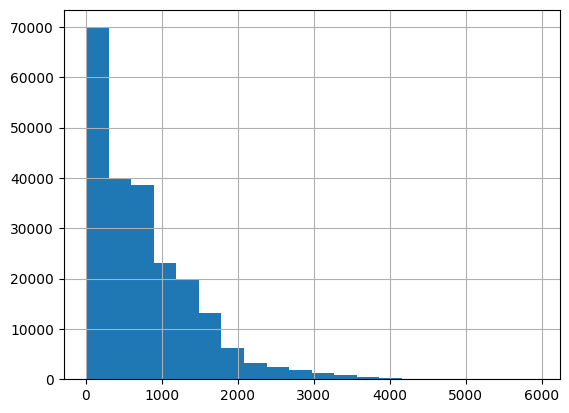

In [29]:
df["num_sold"].hist(bins=20)

So the dataset is recorded daily with: `5 products` $\times$ `3 stores` $\times$ `6 countries` = `90 records`
Our task is to predict `num_sold` columns. There are some approaches here I could think of:
1. Basic ML models, with `store` included as a feature column.
2. Build 3 seperated time-series models for each store (this has more potential)
3. But based on the second bullet points above, I can totally build 90 models for each type of product in each store and in each country. Each model is now a very simple time-series model.

In this project, I will try method 2 and 3. But first, let us try with one specific situations here.

In [2]:
canada_premium_kaggle = df[df["country"] == "Canada"]
canada_premium_kaggle = canada_premium_kaggle[canada_premium_kaggle["store"] == "Premium Sticker Mart"]
canada_premium_kaggle = canada_premium_kaggle[canada_premium_kaggle["product"] == "Kaggle"]
canada_premium_kaggle = canada_premium_kaggle.set_index("date")
canada_premium_kaggle.index = pd.to_datetime(canada_premium_kaggle.index)
canada_premium_kaggle = canada_premium_kaggle.asfreq("D")
canada_premium_kaggle

,id,country,store,product,num_sold
date,,,,,
2010-01-01,11,Canada,Premium Sticker Mart,Kaggle,2212.0
2010-01-02,101,Canada,Premium Sticker Mart,Kaggle,2183.0
2010-01-03,191,Canada,Premium Sticker Mart,Kaggle,2459.0
2010-01-04,281,Canada,Premium Sticker Mart,Kaggle,1714.0
2010-01-05,371,Canada,Premium Sticker Mart,Kaggle,1593.0
...,...,...,...,...,...
2016-12-27,229691,Canada,Premium Sticker Mart,Kaggle,1611.0
2016-12-28,229781,Canada,Premium Sticker Mart,Kaggle,1812.0
2016-12-29,229871,Canada,Premium Sticker Mart,Kaggle,2157.0


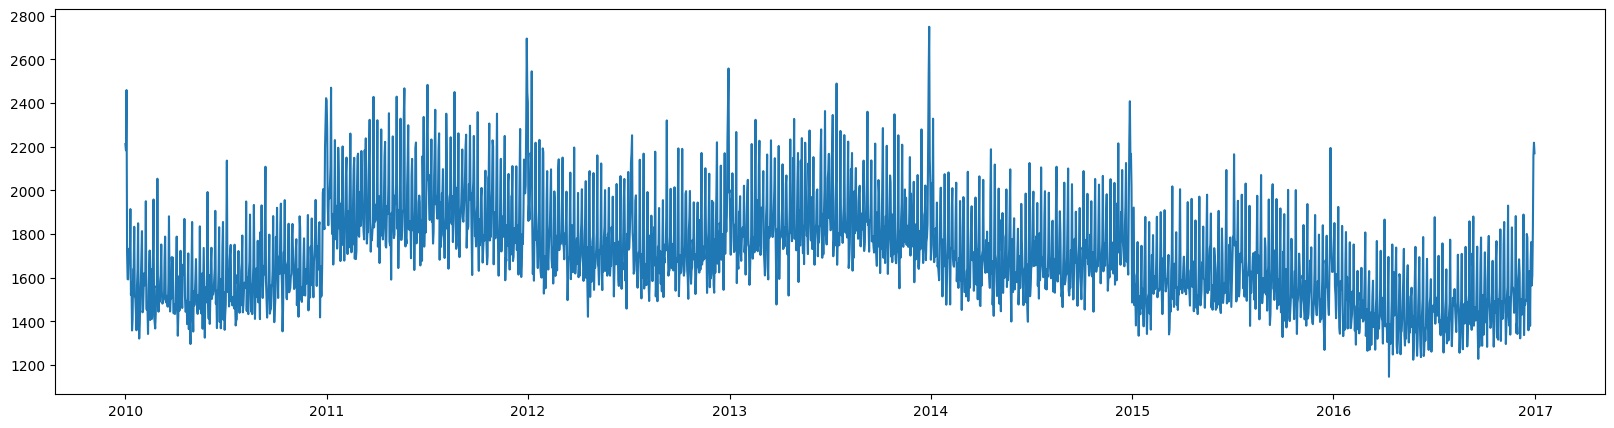

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(canada_premium_kaggle["num_sold"])
plt.show()

I will use LSTM to train and see how this model performs. Note that you can also use simple models such as ARIMA for this problem.

In [68]:
from torch.utils.data import TensorDataset, DataLoader

tensor = torch.tensor(canada_premium_kaggle["num_sold"])
tensor = tensor.view(-1, 1)
tensor.shape

/tmp/ipykernel_29032/86004422.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tensor = torch.tensor(canada_premium_kaggle["num_sold"])


torch.Size([2557, 1])

In [69]:
# Normalize step, because DL models work better with floats than integers
tensor = (tensor - tensor.mean()) / tensor.std()
tensor

tensor([[2.1565],
        [2.0314],
        [3.2222],
        ...,
        [1.9192],
        [2.1824],
        [1.9753]], dtype=torch.float64)

In [70]:
def create_sequences(data, seq_len=30):
    """Create data for training. X are sequences, y are numbers"""
    
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return torch.stack(X), torch.tensor(y)

X, y = create_sequences(tensor)
print(X.shape)
print(y.shape)

torch.Size([2527, 30, 1])
torch.Size([2527])


In [71]:
def split_train_test(X_seq, y_seq, test_ratio=0.2):
    n = len(X_seq)
    train_size = round(n * (1 - test_ratio))
    return X_seq[:train_size], y_seq[:train_size], X_seq[train_size:], y_seq[train_size:]

X_train, y_train, X_test, y_test = split_train_test(X, y)

In [72]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [73]:
train_loader = DataLoader(train_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class SimpleLSTM(nn.Module):
    def __init__(self, hidden_size: int = 8, num_lstm_layers: int = 3, lstm_dropout: float = 0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_lstm_layers = num_lstm_layers
        self.lstm = nn.LSTM(input_size=1, 
                            hidden_size=self.hidden_size, 
                            num_layers=self.num_lstm_layers, 
                            batch_first=True, 
                            dropout=lstm_dropout)
        self.linear = nn.Linear(self.hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.linear(out)
        return out

In [ ]:
from tqdm import tqdm

n_epochs = 2000

model = SimpleLSTM(hidden_size=32, num_lstm_layers=3, lstm_dropout=0.5)
model = model.to("cuda")

optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for epoch in range(1, n_epochs + 1):
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.float().to("cuda"), labels.float().to("cuda")
        outputs = model(inputs)
        optimizer.zero_grad()
        loss = criterion(outputs.squeeze(1), labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(train_loader)}")


Epoch 100, Loss: 0.1942990217357874


In [81]:
model.eval()
with torch.no_grad():
    total_loss = 0.0
    for inputs, labels in test_loader:
        inputs, labels = inputs.float().to("cuda"), labels.float().to("cuda")
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(1), labels)
        total_loss += loss.item()

    print(f"Test Loss: {total_loss / len(test_loader)}")

Test Loss: 0.326797254383564


In [60]:
baseline_mse = torch.mean((y_train - y_train.mean()) ** 2)
print(f'Baseline MSE: {baseline_mse.item()}')

Baseline MSE: 0.8810015254046751
